<a href="https://colab.research.google.com/github/jctan05/biostats_HW/blob/master/STATS522_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STATS522 - John Tan

1. Use the data file fev.txt posted on Canvas for this problem. A researcher measured forced expiratory volume, which is a measure of lung capacity, among 300 healthy children. Variables included in the data are: Age (in years), FEV (in liters), and Height (in inches). We would like to conduct simple regression analysis between FEV (as the outcome) and age (as the predictor).


---


Create a scatter plot of FEV against age. What do you observe? Comment on your findings.


In [0]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

sns.set('notebook')

from statsmodels.stats.diagnostic import het_white, het_arch, het_breuschpagan

In [0]:
df = pd.read_csv('fev.txt', names=['Age', 'FEV', 'Height'], delim_whitespace=True)

In [0]:
df.head()

,Age,FEV,Height
0,9,1.708,57.0
1,8,1.724,67.5
2,7,1.720,54.5
3,9,1.558,53.0
4,9,1.895,57.0


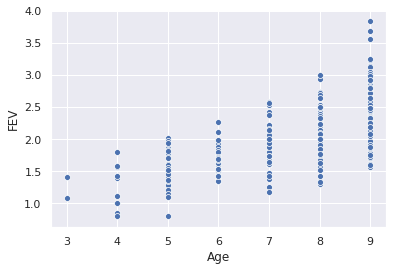

In [0]:
sns.scatterplot(x="Age", y="FEV", data=df)

It seems that there is a weak positive correlation of Age vs. FEV. However the variable Age may add error to the model due to its categorical nature.



---

Run a simple linear regression model using FEV as the outcome and age as the 2
predictor variable. Report the estimated regression equation and $R^{2}$. Is there a significant association between FEV and age?

In [0]:
Y = df['FEV']
X = df['Age']
X = sm.add_constant(X) # add constant because statsmodel doesn't have it by default

model = sm.OLS(Y, X).fit()

model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     225.3
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.60e-38
Time:                        01:14:26   Log-Likelihood:                -141.77
No. Observations:                 300   AIC:                             287.5
Df Residuals:                     298   BIC:                             294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3096      0.117      2.646      0.009       0.079       0.540
Age            0.2305      0.015     15.008      0.000       0.200       0.261
==============================================================================
Omnibus:                        8.547   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.473
Skew:                           0.373   Prob(JB):                       0.0145
Kurtosis:                       3.347   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The estimated regression line is $FEV = 0.3096 + 0.2305 * Age$

The $R^{2}$ is 0.430. Yes, there is a significant association between FEV and age.



---

c. Produce a residual plot against predicted values, as well as a normal probability plot of residuals. Are regression assumptions met? Comment on your findings.

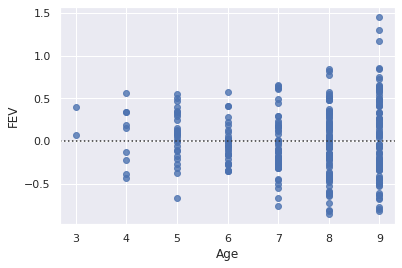

In [0]:
sns.residplot(x="Age", y="FEV", data=df)

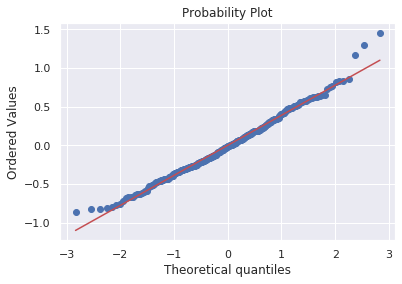

In [0]:
trash_tuple = stats.probplot(x=sm.OLS(Y, X).fit().resid, plot=sns.mpl.pyplot, fit=True)

No, it does not meet regression assumptions because the residual plot shows that error variance increases by age.



---

Conduct White’s test for homoscedasticity. What do you find? Interpret the result.

In [0]:
white_test = het_white(model.resid, X)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 20.91357222405319, 'LM-Test p-value': 2.8752492120466965e-05, 'F-Statistic': 11.127970285123121, 'F-Test p-value': 2.1862163073088987e-05}


Because White's test is significant, we conclude that the model is heteroscedastic.


---


Run the Box-Cox procedure and find an appropriate power transformation Y λ . What is the “best” value of λ that minimizes MSE according to the output? What is the “convenient” value of λ recommended by the procedure? What is the transformation suggested by this “convenient” λ ?


In [0]:
Y_xformed, lambda_val = stats.boxcox(Y)
print(lambda_val)

0.40781411347525753


The "best" value of $\lambda$ that minimizes MSE is 0.4078. The "convenient" value would be 0.5. This suggests that the transformation should be as square root transformation.

In [0]:
model = sm.OLS(Y_xformed, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     250.2
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           2.46e-41
Time:                        01:14:26   Log-Likelihood:                -9.1743
No. Observations:                 300   AIC:                             22.35
Df Residuals:                     298   BIC:                             29.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3700      0.075     -4.919      0.000      -0.518      -0.222
Age            0.1562      0.010     15.817      0.000       0.137       0.176
==============================================================================
Omnibus:                        0.306   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.444
Skew:                          -0.004   Prob(JB):                        0.801
Kurtosis:                       2.812   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

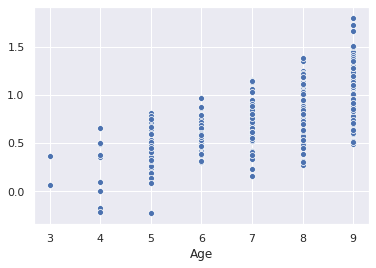

In [0]:
sns.scatterplot(df['Age'], Y_xformed)

The regression equation is $FVE = -0.37 + 0.1562 * Age$ The $R^2$ improved from 0.430 to 0.456. However I expected there to be more improvement than that.



---


g. Repeat parts c) and d) above, using the transformed Y. Did the transformation help?
Comment on your findings.


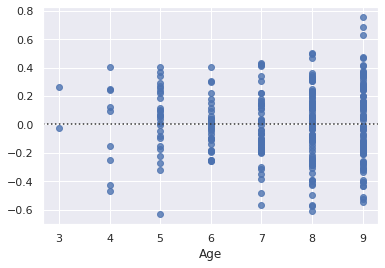

In [0]:
sns.residplot(x=df["Age"], y=Y_xformed)

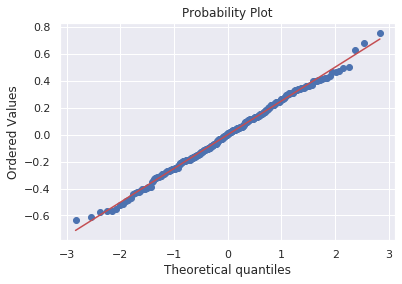

In [0]:
trash_tuple = stats.probplot(x=sm.OLS(Y_xformed, X).fit().resid, plot=sns.mpl.pyplot, fit=True)

In [0]:
white_test = het_white(model.resid, X)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 8.394752427469498, 'LM-Test p-value': 0.015034973670834726, 'F-Statistic': 4.275028470360953, 'F-Test p-value': 0.0147774986648223}


The transformation helped a little bit but it is still not homoscedastic. 


---

Refer to the SENIC data set in the previous assignment. Two models have been proposed for predicting the average length of stay in a hospital (Y: LOS). Model 1 utilizes as predictor variables age (X1), infection risk (X2), and available facilities and services (X3). Model 2 uses as predictor variables number of beds (X1), infection risk (X2), and available facilities and services (X3).
*** Make sure to exclude IDs 47 and 112 prior to analysis below. There should be n = 111 after exclusion. Check # of obs ***

In [0]:
data = pd.read_csv('SENIC.txt', header= None, names=["id", "los", "age", "infect", "culture", "xray", "beds",  
                  "school", "region", "census", "nurses", "service"], delim_whitespace=True)

In [0]:
print('Before clean {}'.format(len(data)))
data = data[data['id'] != 47]
data = data[data['id'] != 112]
print('After clean {}'.format(len(data)))

Before clean 113
After clean 111


In [0]:
data = data[['id', 'los', 'age', 'beds', 'infect', 'service']]

Produce a scatterplot matrix and a correlation matrix among the outcome and all predictor variables involved in the two models. What do you observe? Which predictor variable has the highest correlation with the average length of stay? Comment on your findings.

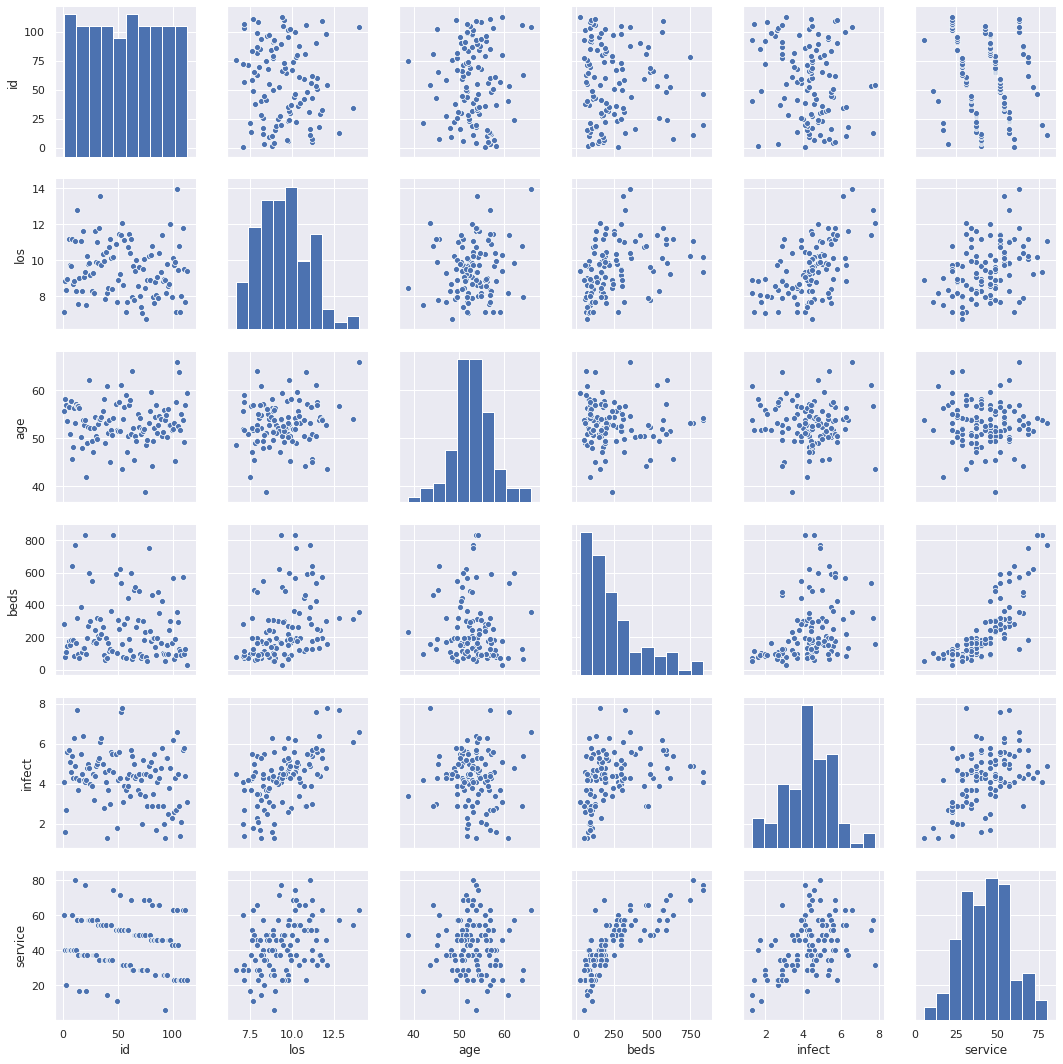

In [0]:
sns.pairplot(data)

In [0]:
data.corr()

,id,los,age,beds,infect,service
id,1.000000,-0.098503,0.031926,-0.085250,-0.231652,-0.118665
los,-0.098503,1.000000,0.122205,0.378011,0.549467,0.367860
age,0.031926,0.122205,1.000000,-0.085716,-0.028424,-0.056921
beds,-0.085250,0.378011,-0.085716,1.000000,0.344461,0.798442
infect,-0.231652,0.549467,-0.028424,0.344461,1.000000,0.401806
service,-0.118665,0.367860,-0.056921,0.798442,0.401806,1.000000


It seems like `los` is not a normal distribution. `infect` has the highest correlation with the average length of stay. To me, that makes sense because getting an infection is very common in hospitals.


---

b. For each of the two proposed models, fit the regression model with three predictor variables. Report the estimated regression equations. Give your interpretation on βˆ
(only for the regression coefficient of X1) for each of the equations.

In [0]:
# Mode1 1: age, infect, service

X1 = data[['age', 'infect', 'service']]
X1 = sm.add_constant(X1) # add constant because statsmodel doesn't have it by default
y1 = data['los']

model1 = sm.OLS(y1, X1).fit()

model1.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    los   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     19.12
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           5.29e-10
Time:                        01:14:38   Log-Likelihood:                -176.29
No. Observations:                 111   AIC:                             360.6
Df Residuals:                     107   BIC:                             371.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8412      1.463      2.625      0.010       0.941       6.742
age            0.0485      0.026      1.872      0.064      -0.003       0.100
infect         0.5326      0.095      5.635      0.000       0.345       0.720
service        0.0178      0.008      2.150      0.034       0.001       0.034
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.263
Skew:                           0.079   Prob(JB):                        0.877
Kurtosis:                       2.821   Cond. No.                         884.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# Mode1 2: beds, infect, service

X2 = data[['beds', 'infect', 'service']]
X2 = sm.add_constant(X2) # add constant because statsmodel doesn't have it by default
y2 = data['los']

model2 = sm.OLS(y2, X2).fit()

model2.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    los   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     18.57
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           9.00e-10
Time:                        01:14:38   Log-Likelihood:                -176.86
No. Observations:                 111   AIC:                             361.7
Df Residuals:                     107   BIC:                             372.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7518      0.477     14.156      0.000       5.806       7.697
beds           0.0016      0.001      1.547      0.125      -0.000       0.004
infect         0.5252      0.095      5.524      0.000       0.337       0.714
service        0.0016      0.013      0.125      0.901      -0.024       0.027
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.119
Skew:                           0.227   Prob(JB):                        0.571
Kurtosis:                       2.812   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 1:

$los = 1.3865 + 0.0837 * age + 0.6584 * infect + 0.0217 * service$

Model 2:

$los = 6.4674 + 0.0030 * beds + 0.6477 * infect - 0.0093 * service$

Because age is a bigger coefficient than beds, it is also a greater predictor. Thus Model 1 is more accurate.



---

Report MSE and R-square for each model. Using R2 as the criterion, is one model clearly
preferable in terms of this measure?


In [0]:
# MSE: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html
# 'mse_resid',  the residual sum of squares divided by the number of degrees of freedom
# 'rsquared',
def mse_and_r_squared(model):
    mse = model.mse_resid
    r2 = model.rsquared
    return mse, r2

m1, r1 = mse_and_r_squared(model1)
m2, r2 = mse_and_r_squared(model2)

mlst = [m1, m2]
rlst = [r1, r2]

R2_df = pd.DataFrame(list(zip(mlst, rlst)), index =['Model 1', 'Model 2'], columns = ['MSE', 'R2'])

R2_df.T

,Model 1,Model 2
MSE,1.455422,1.470205
R2,0.349041,0.342429


No, which model is better is unclear from the R-squared.

---

For Model 1, produce a data set containing predicted values and residuals for all observations. Compute a correlation between length of stay and the predicted values (this correlation is called the coefficient of multiple correlation – refer to MLR 1.pdf lecture note). Manually calculate the square of the correlation coefficient and verify this is equal to R2 that you obtained in part c) above.


In [0]:
data['predicted'] = model1.predict()
data[['predicted', 'los']].corr().values[1][0]**2

0.34904056453790605

The R-squared is the same as the value in part c)

---

e. Using the data set you just created above, run four different tests for normality of residuals in Model 1. Also show a normal probability plot of residuals. Are residuals normally distributed? Comment on your finding.

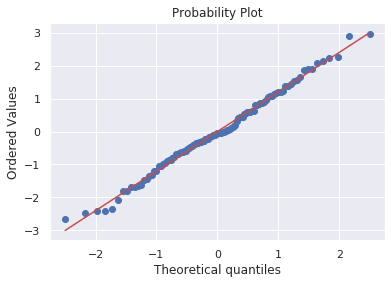

In [0]:
# het_white, het_arch, het_breuschpagan, HetGoldfeldQuandt

data['residual'] = model1.resid

trash_tuple = stats.probplot(x=model1.resid, plot=sns.mpl.pyplot, fit=True)


 Shapiro test ----
            value
W        0.991600
p-value  0.732828

 DAostinos K2  test ----
            value
stat     0.148010
p-value  0.928667

  Anderson test ----
                                        value
p-value                              0.250425
results1  [0.557, 0.634, 0.761, 0.888, 1.056]
results2          [15.0, 10.0, 5.0, 2.5, 1.0]

 Histogram plot ----


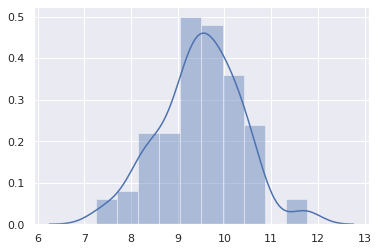

In [0]:
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import numpy as np

def homoscedasticity_test(model):

    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal


    sns.distplot(fitted_vals)

    shapiro_test = pd.DataFrame(stats.shapiro(resids),
                              columns=['value'],
                              index = ['W', 'p-value'])

    k2_test = pd.DataFrame(stats.normaltest(resids), 
                           columns=['value'],
                           index=['stat', 'p-value'])

    and_test = pd.DataFrame(stats.anderson(resids),
                           columns=['value'],
                           index=['p-value', 'results1', 'results2'])

    print('\n Shapiro test ----')
    print(shapiro_test)
    print('\n DAostinos K2  test ----')
    print(k2_test)
    print('\n  Anderson test ----')
    print(and_test)
    print('\n Histogram plot ----')

homoscedasticity_test(model1)

The probability plot in conjunction with the histogram, the Shapiro-Wilks test, the D'Agostino's K2 test, and the Anderson test show that the residuals are normal. 

---

For Model 1, produce a residual plot against predicted values and against each of the three predictor variables. Also using the same model, conduct the White’s test for homoscedasticity Interpret results and state your findings.

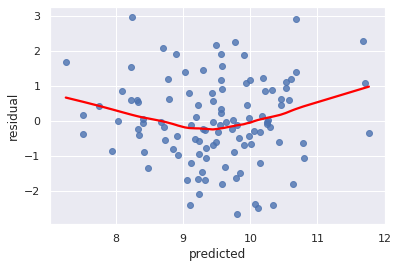

In [0]:
sns.regplot(x=data['predicted'], y=data['residual'], lowess=True, line_kws={'color': 'red'})

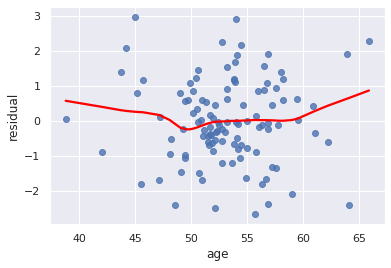

In [0]:
sns.regplot(x=data['age'], y=data['residual'], lowess=True, line_kws={'color': 'red'})

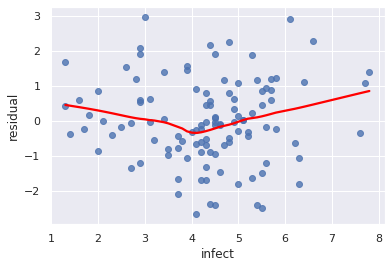

In [0]:
sns.regplot(x=data['infect'], y=data['residual'], lowess=True, line_kws={'color': 'red'})

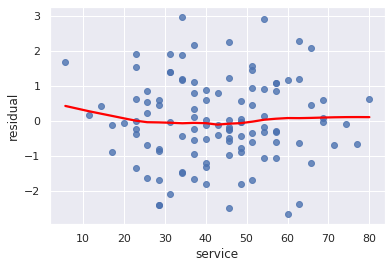

In [0]:
sns.regplot(x=data['service'], y=data['residual'], lowess=True, line_kws={'color': 'red'})

In [0]:
white_test = pd.DataFrame(sms.het_white(model1.resid, model1.model.exog),
                              columns=['value'],
                              index = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'])

In [0]:
white_test

,value
LM Statistic,9.665167
LM-Test p-value,0.378265
F-Statistic,1.070359
F-Test p-value,0.391177


In [0]:
print('The white test is not significant, so it is homoscedastsic. However the residual vs predicted plot shows that the data might not be linear')

The white test is not significant, so it is homoscedastsic. However the residual vs predicted plot shows that the data might not be linear


In [0]:
data[['los', 'age', 'infect', 'service']].describe()

,los,age,infect,service
count,111.000000,111.000000,111.000000,111.000000
mean,9.484324,53.145045,4.321622,42.907207
std,1.474732,4.447016,1.328937,15.200106
min,6.700000,38.800000,1.300000,5.700000
25%,8.320000,50.800000,3.600000,31.400000
50%,9.410000,53.000000,4.400000,42.900000
75%,10.405000,56.050000,5.150000,54.300000
max,13.950000,65.900000,7.800000,80.000000


In [0]:
data[['los', 'age', 'infect', 'service']].corr()

,los,age,infect,service
los,1.000000,0.122205,0.549467,0.367860
age,0.122205,1.000000,-0.028424,-0.056921
infect,0.549467,-0.028424,1.000000,0.401806
service,0.367860,-0.056921,0.401806,1.000000


In [0]:
model1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    los   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     19.12
Date:                Tue, 21 Jan 2020   Prob (F-statistic):           5.29e-10
Time:                        01:14:40   Log-Likelihood:                -176.29
No. Observations:                 111   AIC:                             360.6
Df Residuals:                     107   BIC:                             371.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8412      1.463      2.625      0.010       0.941       6.742
age            0.0485      0.026      1.872      0.064      -0.003       0.100
infect         0.5326      0.095      5.635      0.000       0.345       0.720
service        0.0178      0.008      2.150      0.034       0.001       0.034
==============================================================================
Omnibus:                        0.148   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.263
Skew:                           0.079   Prob(JB):                        0.877
Kurtosis:                       2.821   Cond. No.                         884.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

|Variable| Mean  | SD  | Correlation with LOS  |   | Estimated beta coeff  | 95% CI  |
|---|---|---|---|---|---|---|
|LOS| 9.484   | 1.474  | 1.00  | Intercept  | 3.8412  |  (0.941, 6.742) |
|Age| 53.145  | 4.447  | 0.122  |   | 0.0485  | (-0.003, 0.100)  |
|Infection Risk| 4.321  | 1.329  | 0.549   |   | 0.5326  | (0.345, 0.720)  |
|Facilities & Services   | 42.907  | 15.2   | 0.367   |   | 0.0178  | (0.001, 0.034)  |
|---|---|---|---|---|---|---|
|---|---|---|---|$R^2$|0.349|---|
|---|---|---|---|$Adjusted R^2$|0.331|---|



